# Visualização dos Dados

In [ ]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('musicas_features.xlsx', usecols = "B:T")
df.dropna(subset=['id'])
df = df.drop_duplicates(subset=['id'], keep='last')
df['Ano'] = df['Ano'].astype(int)
df.head()

,Posicao,Musica,Artista,Ano,id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Balancê,Gal Costa,1980,2m1G38M0gJuE4aVPh0tmIP,1979-01-08,0.638,0.736,9.0,-10.536,1.0,0.0811,0.0849,0.000000,0.333,0.881,144.823,188667.0,4.0
1,4,Momentos,Joanna,1980,5ncQCIFnjpHWRXbuKFG8RP,2002-11-08,0.501,0.296,7.0,-12.018,0.0,0.0292,0.8020,0.006370,0.117,0.305,132.462,235147.0,4.0
2,5,Menino do Rio,Baby Consuelo,1980,6tisytwaOaBA4CAZPPdlFP,1978-09-14,0.380,0.548,0.0,-9.260,1.0,0.0333,0.7300,0.000142,0.310,0.395,152.498,263733.0,4.0
3,6,Toada (Na Direção do Dia),Boca Livre,1980,2LO6c0rfmBm49Qs9KtQR1W,2007-01-01,0.402,0.506,6.0,-13.094,0.0,0.0409,0.9280,0.000946,0.728,0.446,97.082,233707.0,4.0
4,9,Meu Bem Querer,Djavan,1980,5ogHB4oYt1C7kaWJYm5MDG,1999-03-25,0.519,0.457,9.0,-8.450,1.0,0.0326,0.7630,0.000666,0.796,0.264,81.561,254800.0,4.0


In [ ]:
plt.rcParams["figure.figsize"] = (30,12)

## Danceability

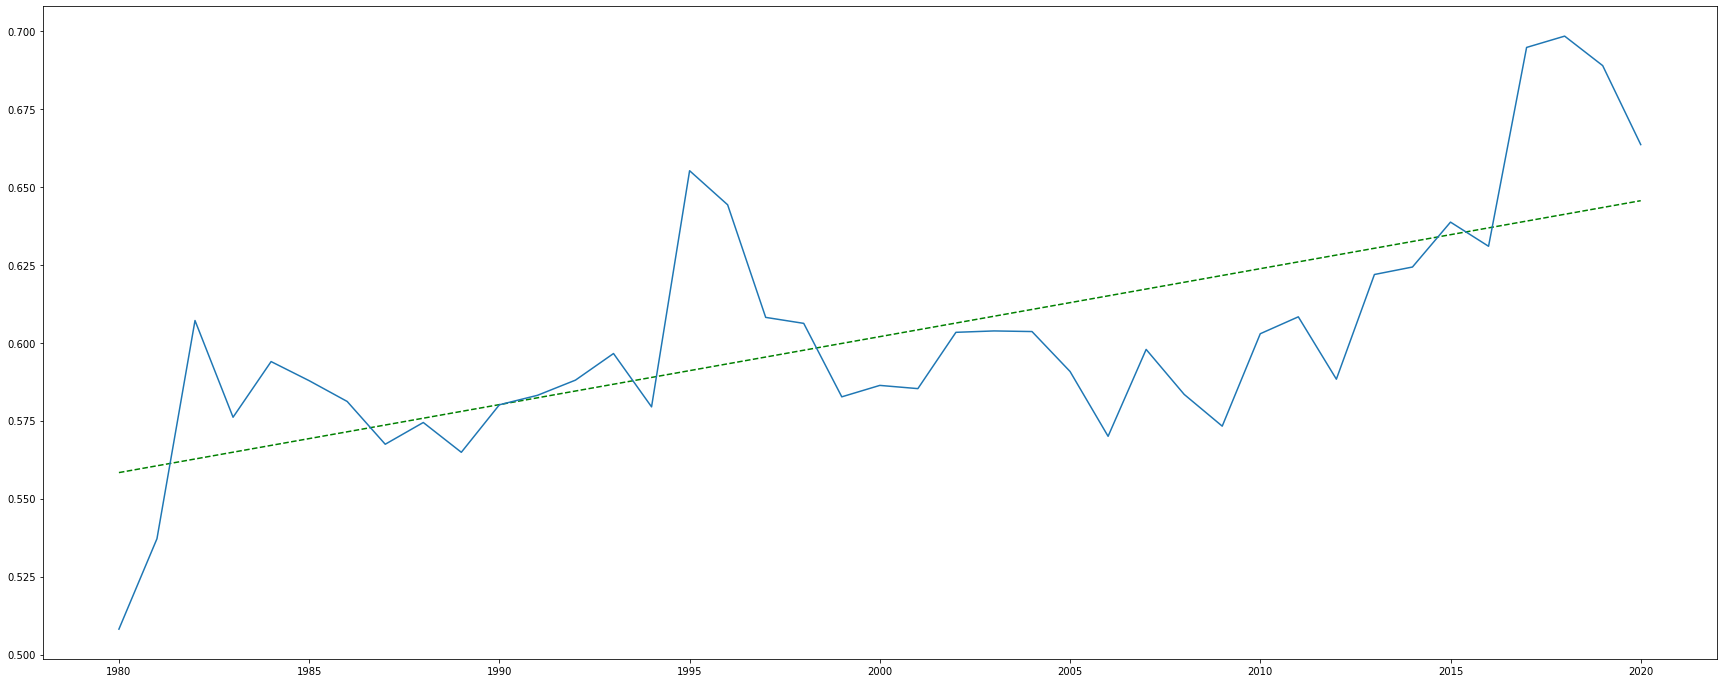

In [ ]:
feature = df.groupby(by='Ano').mean()['danceability'].reset_index()

# plt.plot('Ano', 'danceability', data=feature, marker='', color='red', linewidth=2)
z = np.polyfit(feature['Ano'], feature['danceability'], 1)
p = np.poly1d(z)
plt.plot(feature['Ano'],p(feature['Ano']),"g--")
plt.plot(feature['Ano'], feature['danceability'])

## Duração das músicas

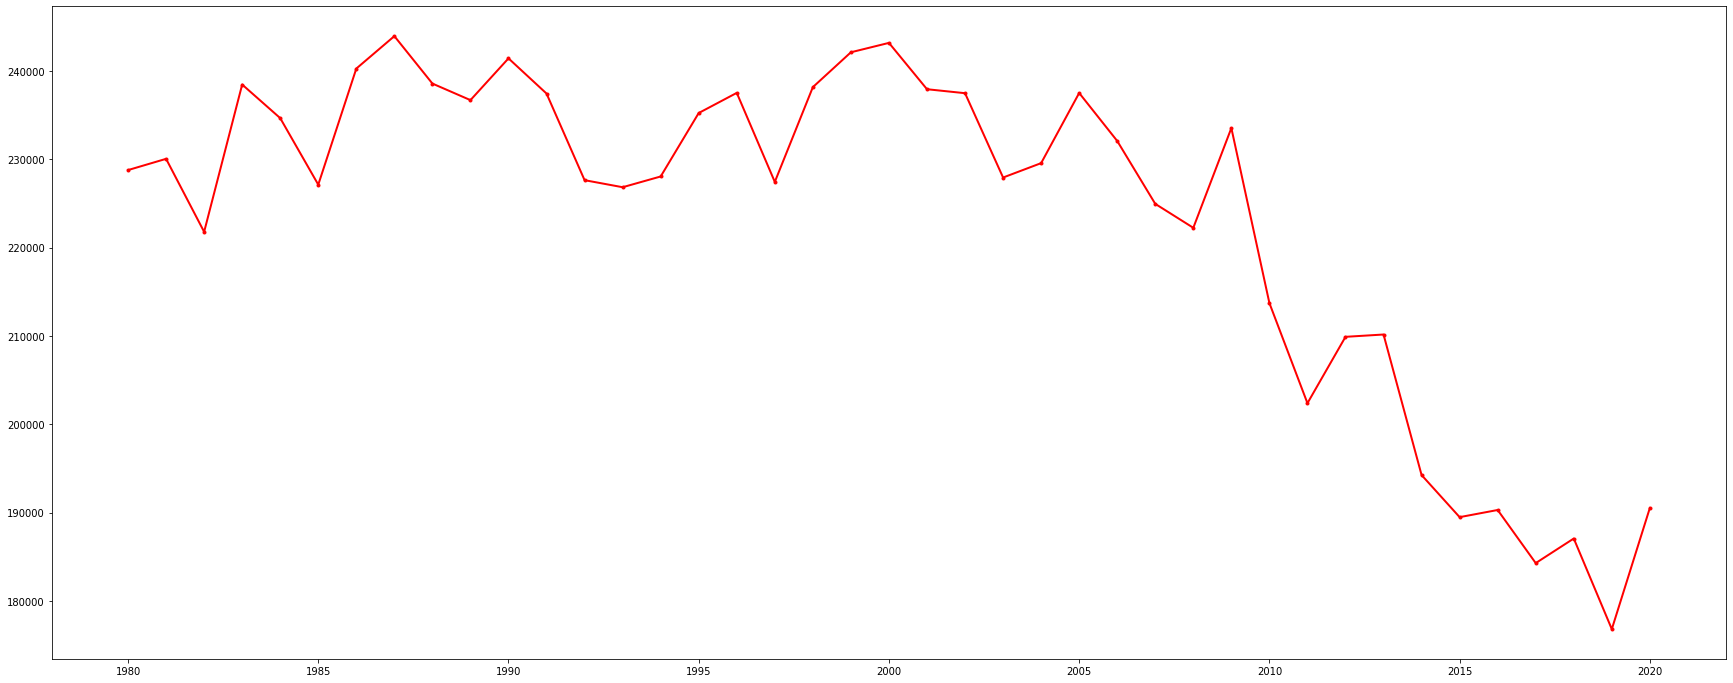

In [ ]:
feature = df.groupby(by='Ano').mean()['duration_ms'].reset_index()

plt.plot('Ano', 'duration_ms', data=feature, marker='.', color='red', linewidth=2)

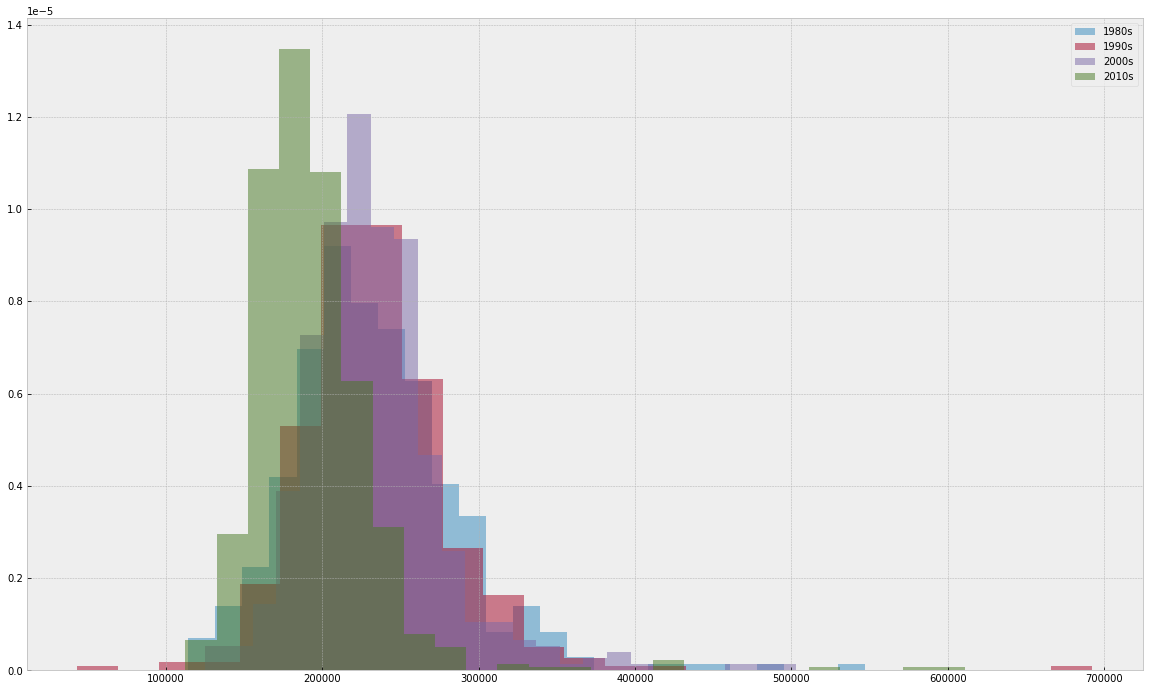

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[(df['Ano'] >= 1980) & (df['Ano'] < 1990)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='1980s')
ax.hist(df[(df['Ano'] >= 1990) & (df['Ano'] < 2000)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='1990s')
ax.hist(df[(df['Ano'] >= 2000) & (df['Ano'] < 2010)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='2000s')
ax.hist(df[(df['Ano'] >= 2010) & (df['Ano'] <= 2020)]['duration_ms'], 
        histtype="stepfilled", bins=25, alpha=0.5, density=True, label='2010s')

plt.legend()
plt.show()

## Batidas por minuto

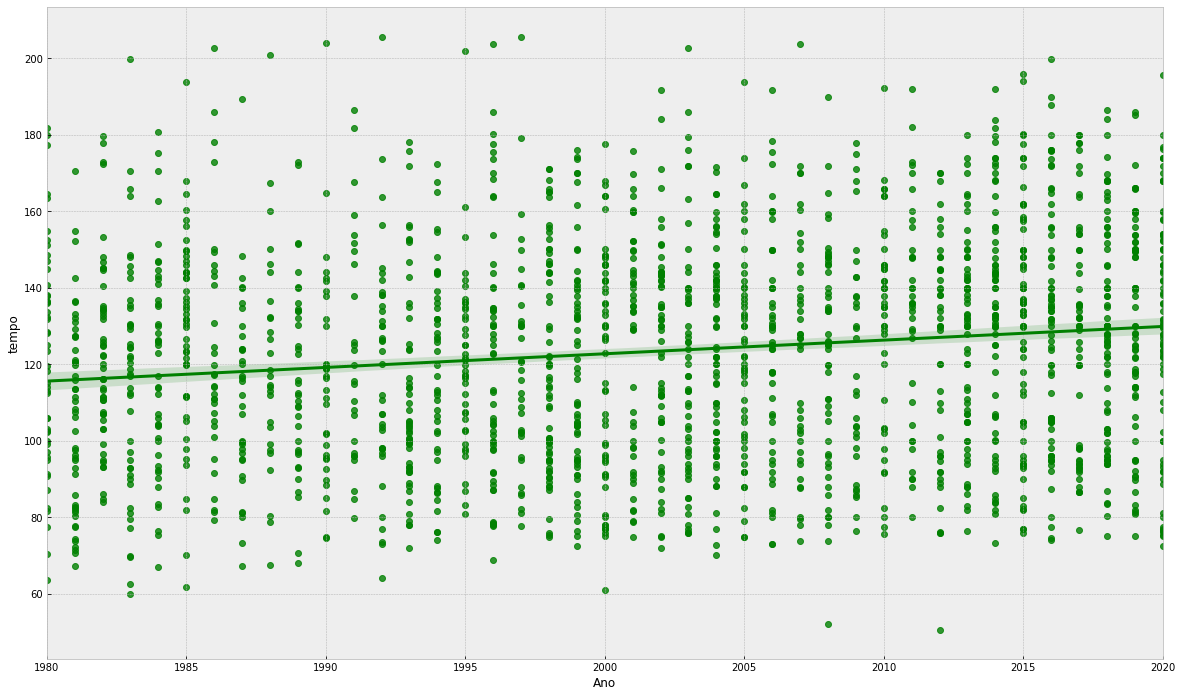

In [ ]:
sns.regplot(x=df["Ano"], y=df["tempo"], color="g")

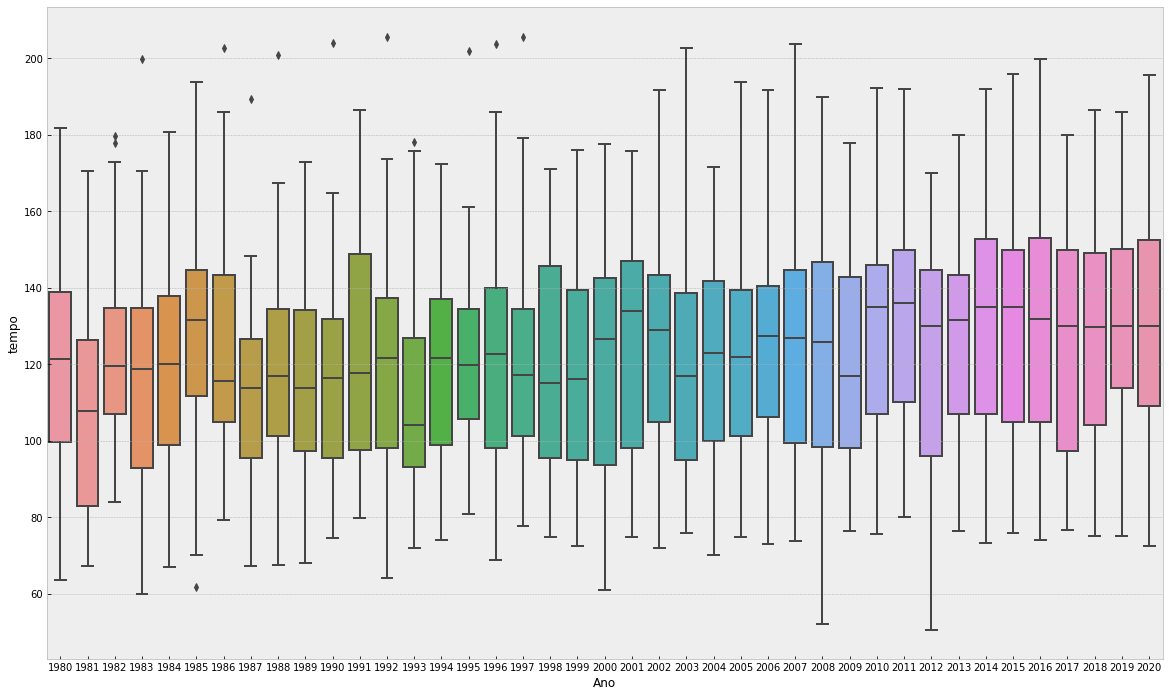

In [ ]:
ax = sns.boxplot(x="Ano", y="tempo", data=df)

## Gravações ao vivo

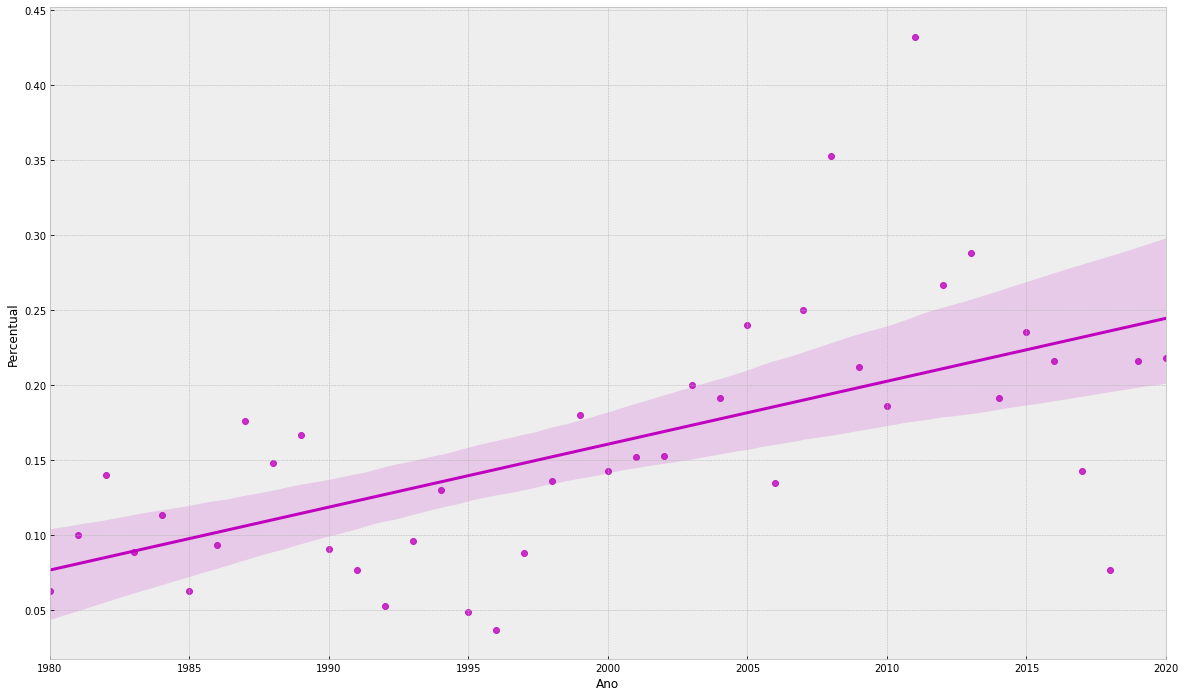

In [ ]:
liveness = pd.DataFrame({'Ano': [], 'Percentual': []})

liveness['Ano'] = df.groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['Ano']
liveness['Percentual'] = df[df['liveness'] > 0.8].groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['liveness'] / df.groupby(['Ano']).agg({'liveness': 'count'}).reset_index()['liveness']

sns.regplot(x=liveness['Ano'], y=liveness['Percentual'], color="m")

## Speechiness

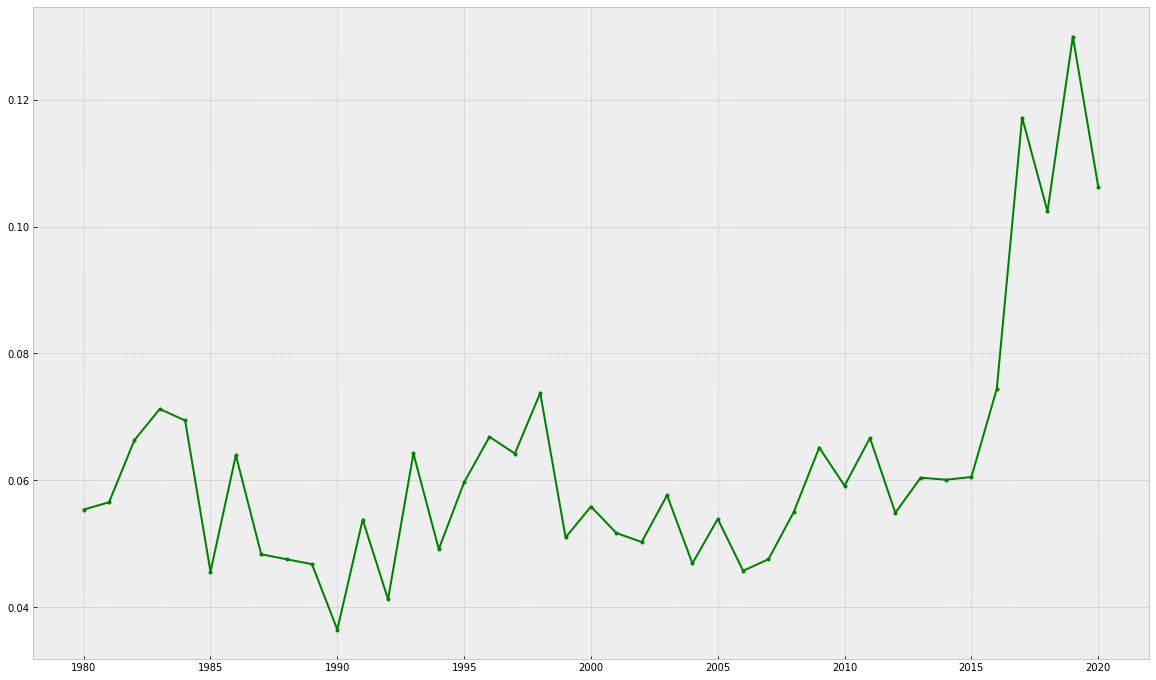

In [ ]:
speechiness = df.groupby(by='Ano').mean()['speechiness'].reset_index()

plt.plot('Ano', 'speechiness', data=speechiness, marker='.', color='green', linewidth=2)

## Valence

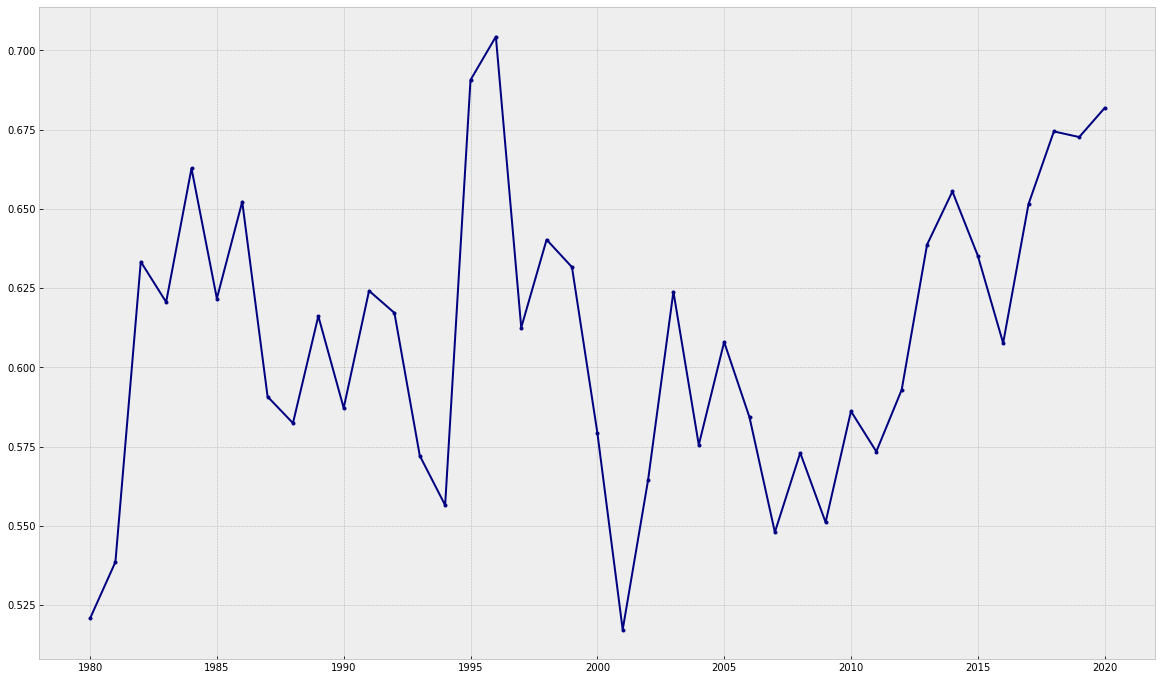

In [ ]:
valence = df.groupby(by='Ano').mean()['valence'].reset_index()

plt.plot('Ano', 'valence', data=valence, marker='.', color='navy', linewidth=2)

In [ ]:
df[df['Ano'] == 1996].sort_values(by='valence', ascending=False)[['Musica', 'Artista', 'valence']]

,Musica,Artista,valence
795,Timbalada,Agua mineral,0.970
801,Tão Seu,Skank,0.969
799,Florentina,Tiririca,0.966
822,Preciso de você,Netinho,0.960
788,"Tic, Tic, Tac",Carrapicho,0.960
793,Rionegro e Solimões,Chora viola,0.932
784,A namorada,Carlinhos Brown,0.931
805,"Devagar, Devagarinho",Martinho da Vila,0.927
786,La Bella Luna,Os Paralamas do Sucesso,0.927
769,recado a minha Amada,Katinguelê,0.926


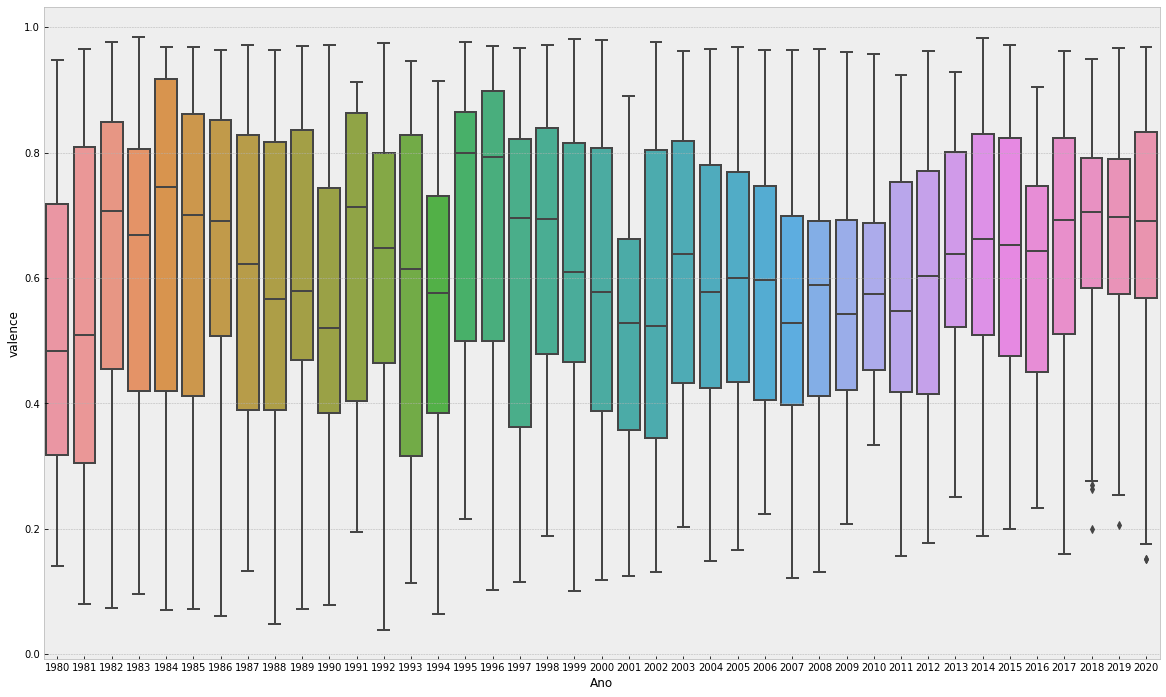

In [ ]:
ax = sns.boxplot(x="Ano", y="valence", data=df)

In [ ]:
df.corr()

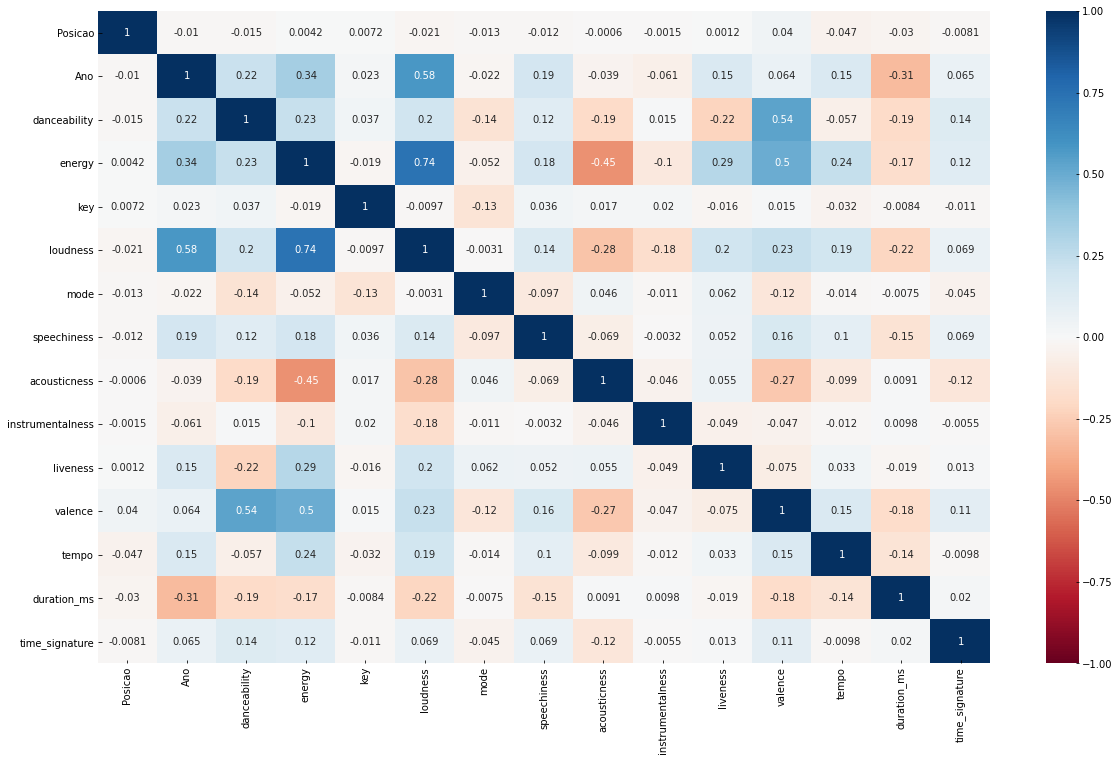

In [ ]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')